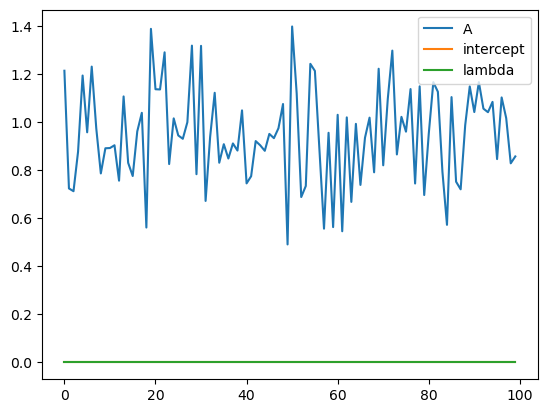

In [19]:
import sys, os
sys.path.append('..')
from collections import defaultdict

import torch as tc
import math
import matplotlib.pyplot as plt

from comparison_models.simple_models.models import VAR1

args = {
        'dim_x': 3,
        'dim_s': 2,
        'intercept': False,
        'max_A_eigval': 100,
        'pbar_descr': None,
        'mean_centering': False,
        'impute_missing_values': False,
       }

T = 1000

param_errors = defaultdict(list)
for seed in range(100):
        tc.manual_seed(seed)

        ### Simulate data with a random model

        simulation_model = VAR1(args)
        simulation_model.params['A'] = tc.randn((args['dim_x'], args['dim_x'])) / args['dim_x']
        simulation_model.params['B'] = tc.randn((args['dim_x'], args['dim_s'])) / args['dim_x']
        simulation_model.params['intercept'] = tc.randn(args['dim_x'])
        simulation_model.params['intercept'] = tc.zeros(args['dim_x'])

        x0 = tc.randn(args['dim_x'])
        noise_var = 0.1
        # inputs = tc.randint(0, 2, (T, args['dim_s']), dtype=tc.float32)
        # inputs = tc.randn((T, args['dim_s']))
        inputs = None
        data = simulation_model.generate_free_trajectory(x0, T, inputs) + tc.randn((T, args['dim_x'])) * math.sqrt(noise_var)

        # ### Fit the model to the data

        model = VAR1(args)
        model.fit_to_data(data, inputs)
        param_errors['A'].append(tc.norm(model.params['A'] - simulation_model.params['A']).item())
        if model.params['B'] is not None:
            param_errors['B'].append(tc.norm(model.params['B'] - simulation_model.params['B']).item())
        param_errors['intercept'].append(tc.norm(model.params['intercept'] - simulation_model.params['intercept']).item())
        param_errors['lambda'].append(model.params['lmbda'])

for p in param_errors:
    plt.plot(param_errors[p], label=p)
plt.legend()